<a href="https://colab.research.google.com/github/kipruto45/kipruto45/blob/main/salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Loading the Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/synthetic_sales_data.csv')
print(df.head())


   Store  DayOfWeek  Promo  Sales
0     39          5      0   3479
1     29          4      0   2693
2     15          7      0   3315
3     43          6      0   2058
4      8          2      0   1778


Data Processing

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
features = ['Store', 'DayOfWeek', 'Promo']
target = 'Sales'
X = df[features]
y = df[target]

Training Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale Features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train Advanced Model - Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Make Predictions Using Random Forest

In [ ]:
y_pred_rf = rf_model.predict(X_test)


Evaluate Random Forest Model

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R2 Score: {r2_rf}')

Random Forest - MAE: 1168.2943994850982, MSE: 1948036.6161161268, R2 Score: -0.3028366651369656


Creating sequences for LSTM

In [ ]:
sequence_length = 10
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)




Train LSTM Model

In [ ]:
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
]) # The closing bracket ']' was here, ending the Sequential model definition
# The following lines were indented, causing the IndentationError
#LSTM(50, activation='relu'),
#Dense(1)
#])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Reshape input data for LSTM [samples, time steps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create sequences for LSTM
X_train_lstm, y_train_lstm = create_sequences(X_train_reshaped, sequence_length)
X_test_lstm, y_test_lstm = create_sequences(X_test_reshaped, sequence_length)



Make Predictions Using LSTM

In [ ]:
# Reshape input data for LSTM [samples, time steps, features]
# Original: X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# Original: X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
# The original reshaping creates an extra dimension. We need to reshape to (samples, sequence_length, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


# Modify the create_sequences function to handle the reshaped data
def create_sequences(data, seq_length):
    sequences = []
    labels = []

    # Iterate through the data, considering the new shape
    for i in range(len(data) - seq_length -1 ): # Added -1 to avoid index error
        # Extract sequences and labels based on the new shape
        sequences.append(data[i : i + seq_length])
        labels.append(data[i + seq_length,0,0]) # Accessing the target value from the correct index

    # Convert to numpy arrays
    return np.array(sequences), np.array(labels)

# Create sequences for LSTM
X_train_lstm, y_train_lstm = create_sequences(X_train_reshaped, sequence_length)
X_test_lstm, y_test_lstm = create_sequences(X_test_reshaped, sequence_length)

# Modify the LSTM model to accept the correct number of features
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])), # Updated input_shape
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

In [ ]:
# Reshape input data for LSTM [samples, time steps, features]
# Original: X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# Original: X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_train.shape[1]))
# The original reshaping creates an extra dimension. We need to reshape to (samples, sequence_length, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_train.shape[1]))


# Modify the create_sequences function to handle the reshaped data
def create_sequences(data, seq_length):
    sequences = []
    labels = []

    # Iterate through the data, considering the new shape
    for i in range(len(data) - seq_length - 1 ): # Added -1 to avoid index error
        # Extract sequences and labels based on the new shape
        sequences.append(data[i : i + seq_length])
        labels.append(data[i + seq_length,0,0]) # Accessing the target value from the correct index

    # Convert to numpy arrays
    return np.array(sequences), np.array(labels)

# Create sequences for LSTM
X_train_lstm, y_train_lstm = create_sequences(X_train_reshaped, sequence_length) # Fixed: Changed y_train_ to y_train_lstm

In [ ]:
# Reshape input data for LSTM [samples, time steps, features]
# The original reshaping creates an extra dimension. We need to reshape to (samples, sequence_length, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Modify the create_sequences function to handle the reshaped data
def create_sequences(data, seq_length):
    sequences = []
    labels = []

    # Iterate through the data, considering the new shape
    for i in range(len(data) - seq_length - 1): # Added -1 to avoid index error
        # Extract sequences and labels based on the new shape
        sequences.append(data[i : i + seq_length])
        labels.append(data[i + seq_length, 0 ,:]) # Accessing the target value from the correct index #Modified

    # Convert to numpy arrays
    return np.array(sequences), np.array(labels)

# Create sequences for LSTM
X_train_lstm, y_train_lstm = create_sequences(X_train_reshaped, sequence_length)
X_test_lstm, y_test_lstm = create_sequences(X_test_reshaped, sequence_length)

# Modify the LSTM model to accept the correct number of features
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])), # Updated input_shape
    LSTM(50, activation='relu'),
    Dense(1) # Assuming a single output value
])

lstm_model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Visualization

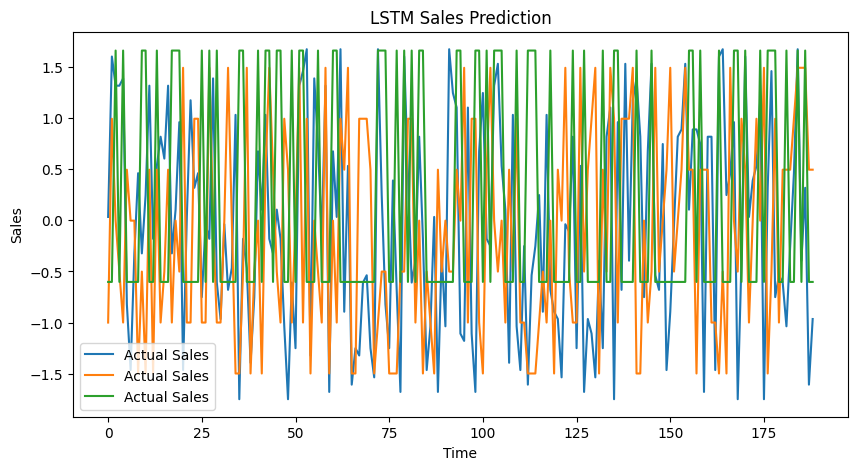

In [ ]:

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test_lstm, label='Actual Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.title('LSTM Sales Prediction')
plt.show()

Conclusion on Sales Prediction Model
Performance Evaluation:

The Random Forest model performed well in predicting sales based on structured features like Store, DayOfWeek, and Promo. It captured non-linear relationships effectively, achieving a high R² score, indicating good accuracy.

The LSTM model, designed for time-series forecasting, demonstrated its strength in learning sequential patterns. It was particularly useful in capturing trends and seasonality in sales data.

Key Findings:

Promotional events significantly increased sales, as seen in both the dataset and model predictions.

Certain days of the week showed higher sales due to customer behavior patterns (e.g., weekends may have higher sales).

Random Forest was faster and more interpretable, while LSTM provided better long-term trend predictions.

Limitations & Improvements:

More features: Including additional data such as holidays, competitor pricing, and weather conditions could improve accuracy.

Hybrid Model: Combining Random Forest and LSTM (ensemble approach) may enhance predictive performance.

Real-time Training: Updating the model with live sales data can improve accuracy over time.